In [36]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [22]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/dw_matrix_three/dw_matrix_road_sign"

/content/drive/My Drive/Colab Notebooks/matrix/dw_matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

In [0]:
X_train, y_train = train['features'],train['labels']
X_test, y_test = test['features'],test['labels']

In [0]:
if y_test.ndim == 1 : y_test = to_categorical(y_test)
if y_train.ndim == 1 : y_train = to_categorical(y_train)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(imput_shape, num_classes):
  return Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

                    Flatten(),

                    Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size =  params_fit.get('batch_size',128),
      epochs =  params_fit.get('epochs',5),
      verbose =  params_fit.get('verbose',1),
      validation_data =  params_fit.get('validation_data',(X_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  
  return model, logdir


In [28]:
model_cnn_1 = get_cnn_v1(input_shape, num_classes)
model_trained, logdir = train_model(model_cnn_1, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 42.5543 - accuracy: 0.7605 - val_loss: 0.2793 - val_accuracy: 0.9371
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2155 - accuracy: 0.9518 - val_loss: 0.1448 - val_accuracy: 0.9670
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1367 - accuracy: 0.9692 - val_loss: 0.0792 - val_accuracy: 0.9800
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1328 - accuracy: 0.9710 - val_loss: 0.1283 - val_accuracy: 0.9747
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1111 - accuracy: 0.9766 - val_loss: 0.0656 - val_accuracy: 0.9845


In [34]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)
  y_pred_prob = model_trained(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [42]:
predict(model_trained, X_test, y_test)

0.854421768707483

In [0]:
df_signnames = pd.read_csv('data/dw_signnames.csv')
labels_dict = df_signnames.to_dict()['b']

In [0]:
def train_and_predict(model):
  model_trained, logdir = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(imput_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')
  ])

In [50]:
model_cnn_2 = get_cnn_v2(input_shape, num_classes)
train_and_predict(model_cnn_2)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 5.3861 - accuracy: 0.3431 - val_loss: 1.0307 - val_accuracy: 0.7252
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.9346 - accuracy: 0.7187 - val_loss: 0.3169 - val_accuracy: 0.9180
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5635 - accuracy: 0.8282 - val_loss: 0.1823 - val_accuracy: 0.9584
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3996 - accuracy: 0.8769 - val_loss: 0.1265 - val_accuracy: 0.9723
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3150 - accuracy: 0.9049 - val_loss: 0.0948 - val_accuracy: 0.9805


0.8877551020408163

In [0]:
def get_cnn_v3(imput_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')
  ])

In [55]:
model_cnn_3 = get_cnn_v3(input_shape, num_classes)
train_and_predict(model_cnn_3)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 1.9254 - accuracy: 0.5544 - val_loss: 0.2255 - val_accuracy: 0.9477
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4404 - accuracy: 0.8704 - val_loss: 0.1154 - val_accuracy: 0.9730
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2789 - accuracy: 0.9190 - val_loss: 0.0634 - val_accuracy: 0.9870
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1873 - accuracy: 0.9446 - val_loss: 0.0330 - val_accuracy: 0.9930
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1412 - accuracy: 0.9572 - val_loss: 0.0265 - val_accuracy: 0.9932


0.9607709750566893

In [0]:
def get_cnn_v4(imput_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')
  ])

In [57]:
get_cnn_v4(input_shape, num_classes).summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)         

In [58]:
model_cnn_4 = get_cnn_v4(input_shape, num_classes)
train_and_predict(model_cnn_4)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.5700 - accuracy: 0.3149 - val_loss: 0.9871 - val_accuracy: 0.7117
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.9230 - accuracy: 0.7059 - val_loss: 0.2193 - val_accuracy: 0.9405
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.4264 - accuracy: 0.8671 - val_loss: 0.0912 - val_accuracy: 0.9730
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2739 - accuracy: 0.9174 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1991 - accuracy: 0.9403 - val_loss: 0.0379 - val_accuracy: 0.9901


0.9682539682539683

In [0]:
def get_cnn_v5(imput_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),
                     
                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')
  ])

In [62]:
model_cnn_5 = get_cnn_v5(input_shape, num_classes)
train_and_predict(model_cnn_5)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.3526 - accuracy: 0.3429 - val_loss: 0.8036 - val_accuracy: 0.7461
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.6403 - accuracy: 0.7960 - val_loss: 0.1702 - val_accuracy: 0.9480
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3151 - accuracy: 0.9043 - val_loss: 0.0809 - val_accuracy: 0.9753
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2206 - accuracy: 0.9343 - val_loss: 0.0417 - val_accuracy: 0.9878
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1584 - accuracy: 0.9534 - val_loss: 0.0400 - val_accuracy: 0.9893


0.9714285714285714

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [68]:
input_shape = X_train_gray.shape[1:]
model_cnn_6 = get_cnn_v5(input_shape, num_classes)
model_cnn_6, logdir = train_model(model_cnn_6, X_train_gray, y_train)
predict(model_cnn_6, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.6886 - accuracy: 0.2489 - val_loss: 0.7934 - val_accuracy: 0.7519
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.5813 - accuracy: 0.8110 - val_loss: 0.1721 - val_accuracy: 0.9449
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2618 - accuracy: 0.9167 - val_loss: 0.0549 - val_accuracy: 0.9849
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1552 - accuracy: 0.9514 - val_loss: 0.0263 - val_accuracy: 0.9925
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1177 - accuracy: 0.9628 - val_loss: 0.0185 - val_accuracy: 0.9949


0.9707482993197278

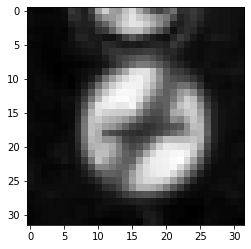

In [70]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))